# Programming Exercises for Python

## Data Wrangling

In [ ]:
# Load dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

In [245]:
low = np.iinfo(np.int32).min
high = np.iinfo(np.int32).max + 1

df = pd.DataFrame({
    "A": np.random.random(size=(6,)),
    "B": np.random.choice(["test","train"], 6,p=[.5,.5]),
    "C": np.random.randint(low, high, size=(6,)),
    "D": pd.Series(np.random.randint(low, high,size=(6,))),
    "E": pd.date_range(start="2021-01-01", periods=6, freq="MS")
})

In [246]:
# Creating matrix with numeric variables
num_matrix = np.matrix(df.select_dtypes("number"))
sum_row = num_matrix.sum(axis=1)

In [247]:
# Sort df by C
df.sort_values(by="C",)

A      B           C           D          E
4  0.623953   test -1629387471   193565612 2021-05-01
1  0.893389   test  -271181390  1278733777 2021-02-01
5  0.115618  train   -82067700  -285966475 2021-06-01
0  0.426351   test    83687961  1401623058 2021-01-01
2  0.944160  train   484878292   442639873 2021-03-01
3  0.501837   test  1080368952  -933283789 2021-04-01

In [ ]:
# Get rows with B = 'train' and C positive
df.query("B=='train' & C >= 0")

A      B          C          D          E
2  0.94416  train  484878292  442639873 2021-03-01

In [ ]:
# Change value of the 4th column and 2nd row
df.iloc[1,3] = 10
df

A      B           C           D          E
0  0.426351   test    83687961  1401623058 2021-01-01
1  0.893389   test  -271181390          10 2021-02-01
2  0.944160  train   484878292   442639873 2021-03-01
3  0.501837   test  1080368952  -933283789 2021-04-01
4  0.623953   test -1629387471   193565612 2021-05-01
5  0.115618  train   -82067700  -285966475 2021-06-01

In [ ]:
# Create a variable F with 3 NaN values
I = np.random.choice(np.array(range(6)),size=3,replace=False)
df["F"] = [np.nan if i in I else np.random.random() for i in range(6)]
df  

A      B           C           D          E         F
0  0.426351   test    83687961  1401623058 2021-01-01  0.681301
1  0.893389   test  -271181390          10 2021-02-01  0.875457
2  0.944160  train   484878292   442639873 2021-03-01       NaN
3  0.501837   test  1080368952  -933283789 2021-04-01       NaN
4  0.623953   test -1629387471   193565612 2021-05-01  0.510422
5  0.115618  train   -82067700  -285966475 2021-06-01       NaN

In [251]:
# Remove NaN values
df.dropna()

A     B           C           D          E         F
0  0.426351  test    83687961  1401623058 2021-01-01  0.681301
1  0.893389  test  -271181390          10 2021-02-01  0.875457
4  0.623953  test -1629387471   193565612 2021-05-01  0.510422

In [ ]:
# Substitute by 0
df.fillna(0)

A      B           C           D          E         F
0  0.426351   test    83687961  1401623058 2021-01-01  0.681301
1  0.893389   test  -271181390          10 2021-02-01  0.875457
2  0.944160  train   484878292   442639873 2021-03-01  0.000000
3  0.501837   test  1080368952  -933283789 2021-04-01  0.000000
4  0.623953   test -1629387471   193565612 2021-05-01  0.510422
5  0.115618  train   -82067700  -285966475 2021-06-01  0.000000

In [253]:
# Convert A into cumulative sum
df["A"] = np.cumsum(df["A"])
df

A      B           C           D          E         F
0  0.426351   test    83687961  1401623058 2021-01-01  0.681301
1  1.319740   test  -271181390          10 2021-02-01  0.875457
2  2.263900  train   484878292   442639873 2021-03-01       NaN
3  2.765737   test  1080368952  -933283789 2021-04-01       NaN
4  3.389690   test -1629387471   193565612 2021-05-01  0.510422
5  3.505309  train   -82067700  -285966475 2021-06-01       NaN

In [1]:
# Subtract A from B ¿?
# NOTE: I don't know what you mean by "Subtract A from B" since A is float type and B text.

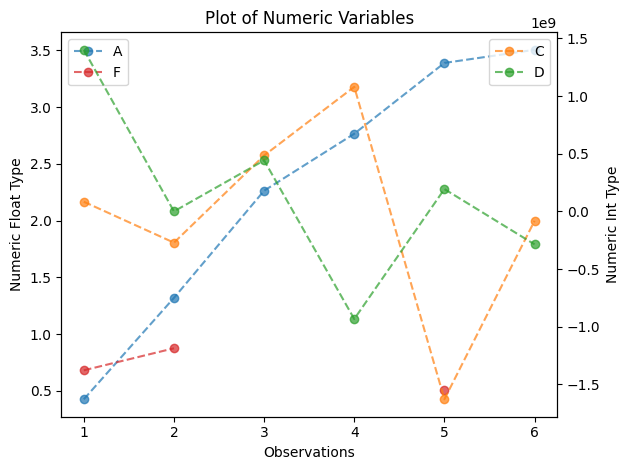

In [333]:
# Plot numeric cols
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

num_v = df.select_dtypes("number").columns
colors = plt.get_cmap('tab10')

for i in range(len(num_v)):
    v, c = num_v[i], colors(i % 20)
    if df[v].dtype == np.float64: 
        ax.plot(range(1,len(df)+1), df[v], color=c, label=v, linestyle='--', marker='o', alpha=0.7)
    if df[v].dtype == np.int32 or df[v].dtype == np.int64: 
        ax2.plot(range(1,len(df)+1), df[v], color=c, label=v, linestyle='--', marker='o', alpha = 0.7)

ax.set_ylabel("Numeric Float Type")
ax2.set_ylabel("Numeric Int Type")

ax.set_xlabel("Observations")
ax.set_title("Plot of Numeric Variables")

ax.legend(loc=0)
ax2.legend(loc=1)


plt.tight_layout()
plt.show()

In [257]:
# Mean by groups
df.groupby("B").mean()


A            C             D                   E        F
B                                                                      
test   1.975380 -184127987.0  1.654762e+08 2021-03-02 06:00:00  0.68906
train  2.884604  201405296.0  7.833670e+07 2021-04-16 00:00:00      NaN

In [311]:
a = pd.DataFrame(
    {"value": [1, 2, 3, 4, 5, 6], "group": ["a", "a", "a", "b", "b", "b"]}
)
# Version 1
# pd.DataFrame(a.groupby("group")['value'].groups)
# Version 2
a.pivot_table(index=a.groupby('group').cumcount(), columns='group', values='value')

group    a    b
0      1.0  4.0
1      2.0  5.0
2      3.0  6.0

In [ ]:
b = pd.DataFrame(
    {"a": [1, 2, 3], "b": [4, 5, 6]}
)
b.melt(var_name="group")

group  value
0     a      1
1     a      2
2     a      3
3     b      4
4     b      5
5     b      6